In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kids_data = pd.DataFrame({'height':np.arange(2.0,4.5,0.2),'percentage of kids':[1,9,0.5,5,4.5,15,0.8,4.2,13,7,22,8,10]})
adults_data = pd.DataFrame({'height':np.arange(4.6,7.1,0.2),'percentage of adults':[1,3,3.5,6,6.5,15,16.8,9.2,13,10,11,4,1]})

In [3]:
sum(adults_data.iloc[:,1])      #checking if the total percentage of adults is 100%

100.0

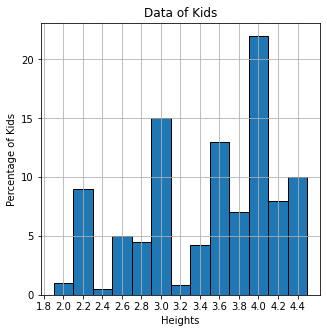

In [4]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.hist(x = kids_data.iloc[:,0],weights = kids_data.iloc[:,1],bins = np.arange(1.9,4.7,0.2),ec='black')
ax.set_xticks(np.arange(1.8,4.4,0.2))
ax.grid(True)
ax.set(title = 'Data of Kids',xlabel='Heights',ylabel='Percentage of Kids')
plt.show()

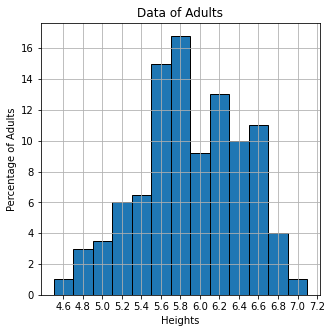

In [5]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.hist(x = adults_data.iloc[:,0],weights = adults_data.iloc[:,1],bins = np.arange(4.5,7.3,0.2),ec='black')
ax.set_xticks(np.arange(4.6,7.3,0.2))
ax.grid(True)
ax.set(title = 'Data of Adults',xlabel='Heights',ylabel='Percentage of Adults')
plt.show()

In [6]:
class Agent:
  def __init__(self):
    self.points = 0
    self.pred = 0
  def action(self,observation):
    self.pred = np.random.randint(0,2)
    return(self.pred)

In [17]:
class Environment:

  kids_data = pd.DataFrame({'height':np.arange(2.0,4.5,0.2),'percentage of kids':[1,9,0.5,5,4.5,15,0.8,4.2,13,7,22,8,10]})
  adults_data = pd.DataFrame({'height':np.arange(4.4,6.9,0.2),'percentage of adults':[1,9,0.5,5,4.5,15,0.8,4.8,13,10,22,8,1]})
  adults_gen = []
  kids_gen = []
  k_or_a = 0
  
  def __init__(self):
    self.height = 0

  def generate_person(self,data,rng):
    cur = 0
    for i in range(len(data)):
      if(rng>=cur and rng<cur+data.iloc[i,1]):
        return(i)
      cur += data.iloc[i,1]
    return(len(data)-1)

  def get_sample(self):
    self.k_or_a = np.random.rand()
    if(self.k_or_a<=0.4):
      self.k_or_a = 0
    else:
      self.k_or_a = 1
    rng = np.random.randint(0,100)
    if(self.k_or_a<=0.4):
      self.height = adults_data.iloc[self.generate_person(adults_data,rng),0]
      self.adults_gen.append(self.height)
    else:
      self.height = kids_data.iloc[self.generate_person(kids_data,rng),0]
      self.kids_gen.append(self.height)
    return self.height

  def state(self):
    return(self.k_or_a)

  def feedback(self,action):
    result = self.state()
    if(result==action):
      return(1)
    else:
      return(0)

In [18]:
a1 = Agent()
e1 = Environment()

In [19]:
"%.1f"%e1.get_sample()

'5.2'

In [20]:
agent_data = pd.DataFrame()
a1.points = 0

In [21]:
for t in range(1000):
  h = e1.get_sample()
  a = a1.action(h)
  s = e1.state()
  r = e1.feedback(a)
  a1.points += r
  dat = {'time':t+1,'height':'%.1f'%h,'state':s,'action':a,'reward':r}
  if((t+1)%100==0):  
    print(dat)
  agent_data = agent_data.append(dat,ignore_index=True)

{'time': 100, 'height': '2.8', 'state': 1, 'action': 1, 'reward': 1}
{'time': 200, 'height': '3.8', 'state': 1, 'action': 0, 'reward': 0}
{'time': 300, 'height': '5.8', 'state': 0, 'action': 0, 'reward': 1}
{'time': 400, 'height': '4.2', 'state': 1, 'action': 0, 'reward': 0}
{'time': 500, 'height': '4.4', 'state': 1, 'action': 1, 'reward': 1}
{'time': 600, 'height': '6.0', 'state': 0, 'action': 1, 'reward': 0}
{'time': 700, 'height': '4.4', 'state': 1, 'action': 0, 'reward': 0}
{'time': 800, 'height': '6.2', 'state': 0, 'action': 1, 'reward': 0}
{'time': 900, 'height': '3.0', 'state': 1, 'action': 0, 'reward': 0}
{'time': 1000, 'height': '2.4', 'state': 1, 'action': 1, 'reward': 1}


###1)

In [22]:
agent_data.to_csv('agent_data_q1.csv',index=False,columns= ['time','height','state','action','reward'])

###2)

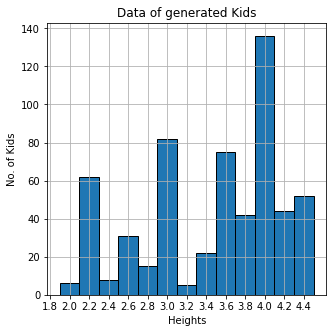

In [23]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.hist(e1.kids_gen,bins = np.arange(1.9,4.7,0.2),ec='black')
ax.set_xticks(np.arange(1.8,4.4,0.2))
ax.grid(True)
ax.set(title = 'Data of generated Kids',xlabel='Heights',ylabel='No. of Kids')
plt.show()

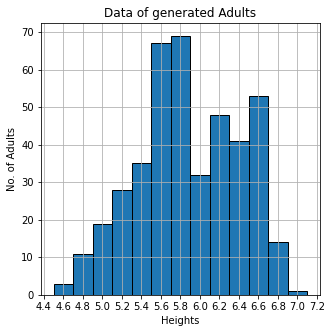

In [24]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.hist(e1.adults_gen,bins = np.arange(4.5,7.3,0.2),ec='black')
ax.set_xticks(np.arange(4.4,7.3,0.2))
ax.grid(True)
ax.set(title = 'Data of generated Adults',xlabel='Heights',ylabel='No. of Adults')
plt.show()

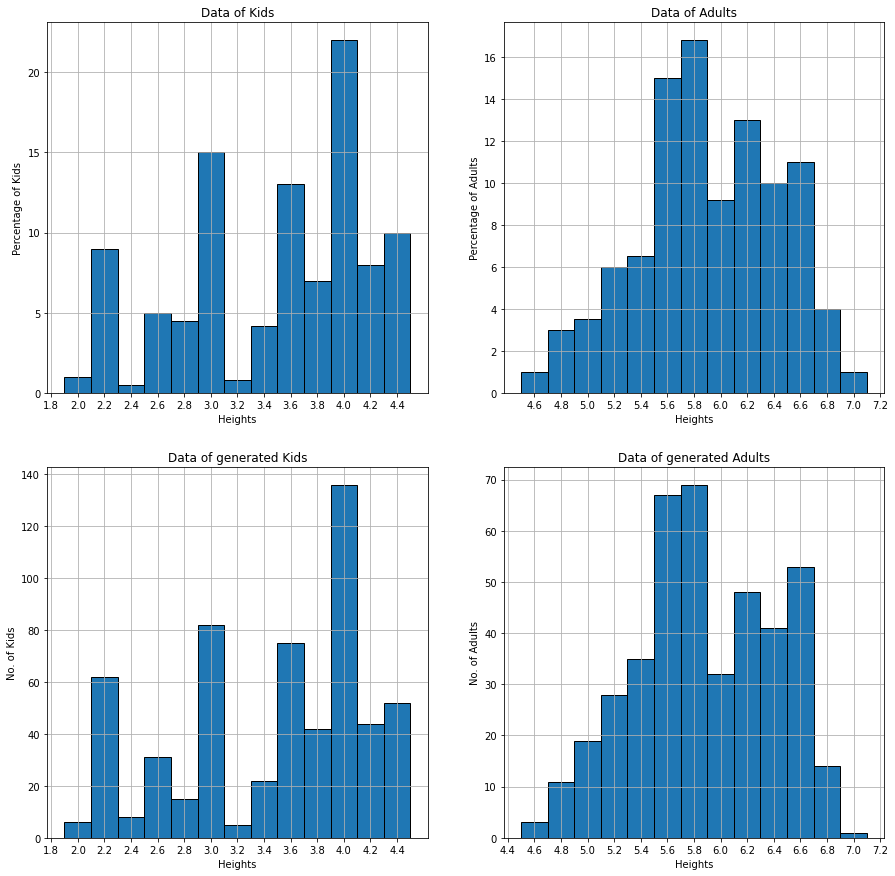

In [25]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].hist(x = kids_data.iloc[:,0],weights = kids_data.iloc[:,1],bins = np.arange(1.9,4.7,0.2),ec='black')
ax[0,0].set_xticks(np.arange(1.8,4.4,0.2))
ax[0,0].grid(True)
ax[0,0].set(title = 'Data of Kids',xlabel='Heights',ylabel='Percentage of Kids')
ax[0,1].hist(x = adults_data.iloc[:,0],weights = adults_data.iloc[:,1],bins = np.arange(4.5,7.3,0.2),ec='black')
ax[0,1].set_xticks(np.arange(4.6,7.3,0.2))
ax[0,1].grid(True)
ax[0,1].set(title = 'Data of Adults',xlabel='Heights',ylabel='Percentage of Adults')
ax[1,0].hist(e1.kids_gen,bins = np.arange(1.9,4.7,0.2),ec='black')
ax[1,0].set_xticks(np.arange(1.8,4.4,0.2))
ax[1,0].grid(True)
ax[1,0].set(title = 'Data of generated Kids',xlabel='Heights',ylabel='No. of Kids')
ax[1,1].hist(e1.adults_gen,bins = np.arange(4.5,7.3,0.2),ec='black')
ax[1,1].set_xticks(np.arange(4.4,7.3,0.2))
ax[1,1].grid(True)
ax[1,1].set(title = 'Data of generated Adults',xlabel='Heights',ylabel='No. of Adults')
plt.savefig('final_graph_q1.png')
plt.show()

###3)

In [26]:
print("total reward:",a1.points,"\naverage reward:",a1.points/1000)

total reward: 496 
average reward: 0.496


(array([420.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 580.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

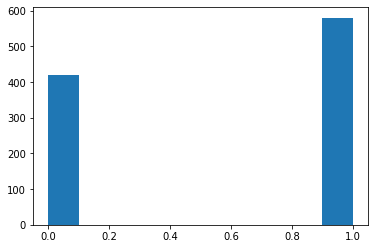

In [29]:
plt.hist(agent_data['state'])